Alunas:
- Letícia Gabriela
- Maria Fernanda Herculano

# Original

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

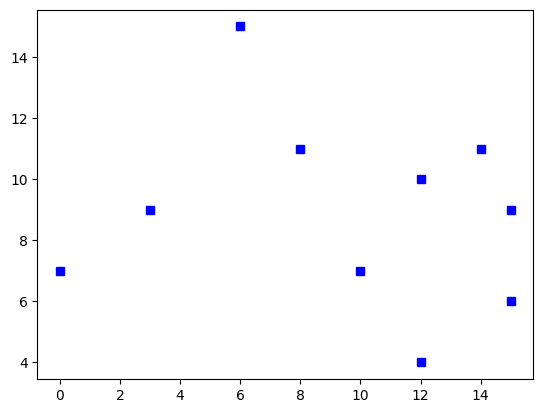

In [ ]:
import ant_colony as aco

#given some nodes, and some locations...
test_nodes = {0: (0, 7), 1: (3, 9), 2: (12, 4), 3: (14, 11), 4: (8, 11), 5: (15, 6), 6: (6, 15), 7: (15, 9), 8: (12, 10), 9: (10, 7)}

x = []
y =[]
for key in sorted(test_nodes.keys()):
	x.append(test_nodes[key][0])
	y.append(test_nodes[key][1])

plt.plot(x,y,'bs')

[0, 1, 6, 4, 8, 3, 7, 5, 2, 9]


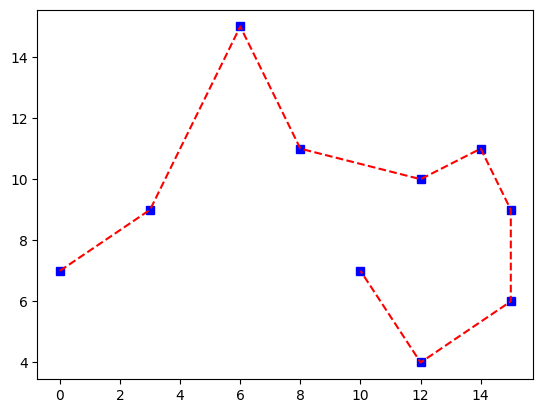

In [ ]:
#...and a function to get distance between nodes...
def distance(start, end):
	x_distance = abs(start[0] - end[0])
	y_distance = abs(start[1] - end[1])

	#c = sqrt(a^2 + b^2)
	import math
	return math.sqrt(pow(x_distance, 2) + pow(y_distance, 2))

#...we can make a colony of ants...
colony = aco.ant_colony(test_nodes, distance)

#...that will find the optimal solution with ACO
answer = colony.mainloop()

print(answer)

x2 = []
y2 =[]
for key in answer:
	x2.append(test_nodes[key][0])
	y2.append(test_nodes[key][1])


plt.plot(x,y, 'bs', x2, y2, 'r--')

# Grafo com os municípios

In [ ]:
def convert_to_float(coord_str):
    coord_str = coord_str.replace(",", ".")
    return np.double(coord_str)

In [ ]:
df = pd.read_csv("/content/alagoas_TSP.txt", sep="\t")
df["latitude"] = df["latitude"].apply(convert_to_float)
df["longitude"] = df["longitude"].apply(convert_to_float)
df.head()

,nome,latitude,longitude
0,Maceió,-9.66599,-35.7350
1,Água Branca,-9.26200,-37.9380
2,Anadia,-9.68489,-36.3078
3,Arapiraca,-9.75487,-36.6615
4,Atalaia,-9.51190,-36.0086


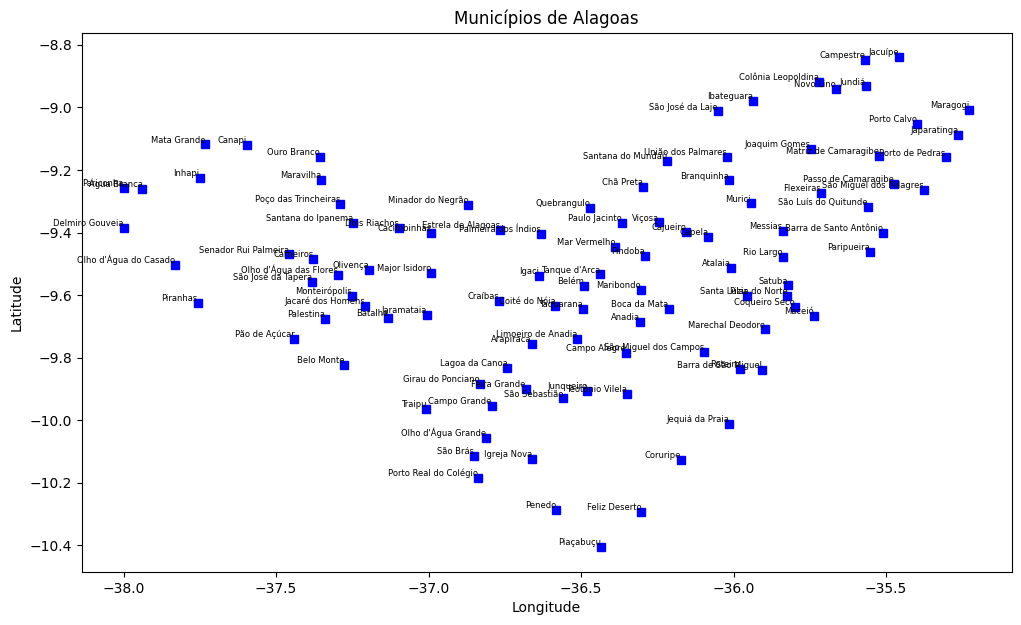

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(df["longitude"], df["latitude"], "bs")

for i, row in df.iterrows():
    plt.text(row["longitude"], row["latitude"], row["nome"], fontsize=6, ha='right', va='bottom')

plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Municípios de Alagoas')
plt.show()

# Reproduzir código de execução com os municípios


A segunda parte da atividade é alterar o notepad ACO_TSP_Example.ipynb para resolver o problema do caixeiro viajante considerando Maceió como a cidade inicial. O algoritmo deve imprimir um gráfico com um linha que ligue os vértices e represente o melhor caminho encontrado, e também deve imprimir a lista dos nomes dos munícipios na ordem em que foram visitados (Maceió deverá ser o primeiro).


In [ ]:
nodes = {}
for i in range(len(df)):
  nodes[df['nome'][i]] = (df["longitude"][i], df["latitude"][i])

['Maceió', 'Satuba', 'Pindoba', 'Rio Largo', 'São Luís do Quitunde', 'Passo de Camaragibe', 'São Miguel dos Milagres', 'Barra de Santo Antônio', 'Paripueira', 'Teotônio Vilela', 'Coruripe', 'Jequiá da Praia', 'São Miguel dos Campos', 'Roteiro', 'Barra de São Miguel', 'Messias', 'Atalaia', 'Quebrangulo', 'Branquinha', 'União dos Palmares', 'Santana do Mundaú', 'Viçosa', 'Capela', 'Cajueiro', 'Igaci', 'Craíbas', 'Estrela de Alagoas', 'Porto Real do Colégio', 'São Brás', 'Traipu', 'Lagoa da Canoa', 'Girau do Ponciano', 'Belo Monte', 'Pão de Açúcar', 'São José da Tapera', "Olho d'Água das Flores", 'Monteirópolis', 'Jacaré dos Homens', 'Palestina', 'Batalha', 'Cacimbinhas', 'Dois Riachos', 'Santana do Ipanema', 'Poço das Trincheiras', 'Maravilha', 'Ouro Branco', 'Canapi', 'Mata Grande', 'Inhapi', 'Água Branca', 'Pariconha', 'Delmiro Gouveia', "Olho d'Água do Casado", 'Piranhas', 'Senador Rui Palmeira', 'Carneiros', 'Olivença', 'Jaramataia', 'Feira Grande', 'Arapiraca', 'Coité do Nóia', 'Lim

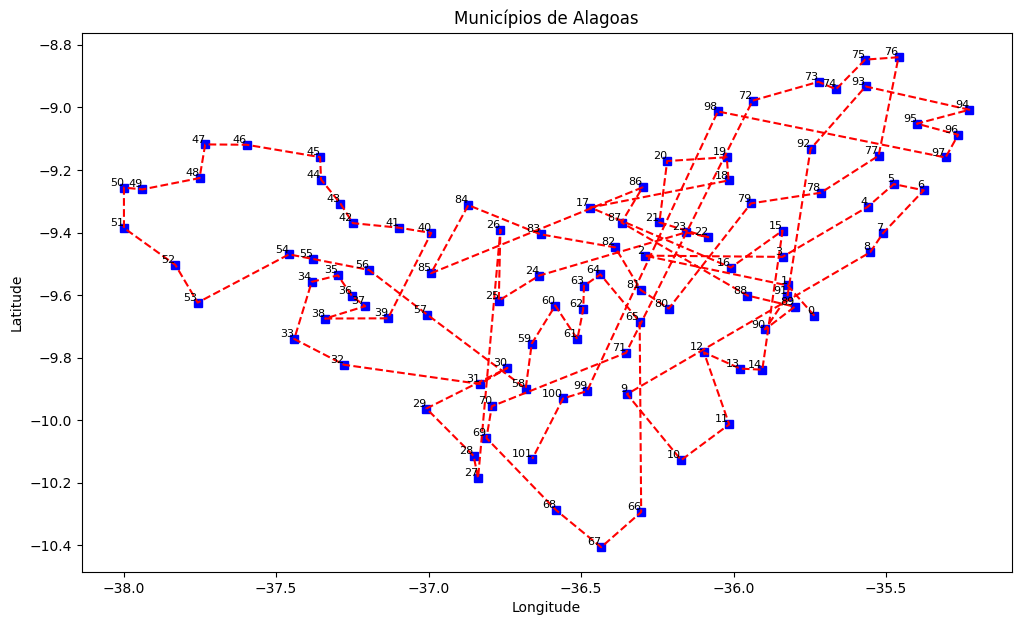

In [ ]:
colony_euclidiana = aco.ant_colony(nodes, distance, start="Maceió")

#...that will find the optimal solution with ACO
answer_euclidiana = colony_euclidiana.mainloop()

print(answer_euclidiana)

x2 = []
y2 =[]
for key in answer_euclidiana:
	x2.append(nodes[key][0])
	y2.append(nodes[key][1])


plt.figure(figsize=(12, 7))
plt.plot(df["longitude"], df["latitude"], 'bs', x2, y2, 'r--')

for i, row in df.iterrows():
  plt.text(row["longitude"], row["latitude"], answer_euclidiana.index(row["nome"]), fontsize=8, ha='right', va='bottom')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Municípios de Alagoas')
plt.show()

# Alterar o cálculo da distância

Uma forma mais precisa de calcular distância neste contexto de cidades é a fórmula de Haversine para distância [d = 2*r*arcsin(...); vide wikipedia]. A última parte da atividade é executar o ACO utilizando a fórmula de Haversine ao invés da distância euclidiana.

In [ ]:
def haversine(start, end):
  long1, lat1 = start[0], start[1]
  long2, lat2 = end[0], end[1]

  x_distance = abs(lat1 - lat2)
  y_distance = abs(long1 - long2)

  r = 6371.0 # raio médio da Terra em km
  h = math.sin((lat2-lat1)/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin((long2-long1)/2)**2
  d = 2 * r * math.asin(math.sqrt(h))

  return d

['Maceió', 'Coqueiro Seco', 'Santa Luzia do Norte', 'Satuba', 'Marechal Deodoro', 'Atalaia', 'Pilar', 'Barra de São Miguel', 'Jundiá', 'Jacuípe', 'Maragogi', 'Passo de Camaragibe', 'São Luís do Quitunde', 'Paripueira', 'Japaratinga', 'Porto Calvo', 'São Miguel dos Milagres', 'Porto de Pedras', 'Joaquim Gomes', 'Novo Lino', 'Colônia Leopoldina', 'Campestre', 'Ibateguara', 'Branquinha', 'Murici', 'União dos Palmares', 'Cajueiro', 'Coité do Nóia', "Tanque d'Arca", 'Belém', 'Taquarana', 'Igaci', 'Boca da Mata', 'Campo Alegre', 'Paulo Jacinto', 'Mar Vermelho', 'Quebrangulo', 'Maribondo', 'Anadia', 'São Miguel dos Campos', 'Jequiá da Praia', 'Coruripe', 'Batalha', 'Cacimbinhas', 'Dois Riachos', 'Senador Rui Palmeira', 'São José da Tapera', 'Carneiros', 'Inhapi', 'Água Branca', 'Pariconha', 'Delmiro Gouveia', 'Piranhas', "Olho d'Água do Casado", 'Pão de Açúcar', 'Palestina', 'Monteirópolis', "Olho d'Água das Flores", 'Olivença', 'Major Isidoro', 'Traipu', 'Jacaré dos Homens', 'Jaramataia', 'G

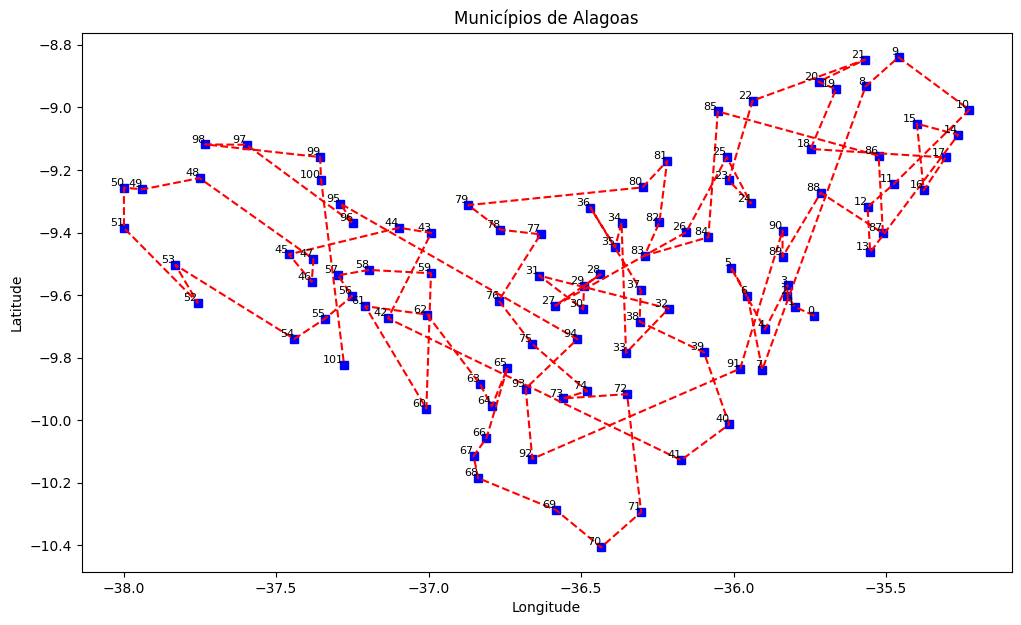

In [ ]:
colony = aco.ant_colony(nodes, haversine, start="Maceió")

#...that will find the optimal solution with ACO
answer_haversine = colony.mainloop()

print(answer_haversine)

x2 = []
y2 =[]
for key in answer_haversine:
	x2.append(nodes[key][0])
	y2.append(nodes[key][1])


plt.figure(figsize=(12, 7))
plt.plot(df["longitude"], df["latitude"], 'bs', x2, y2, 'r--')

for i, row in df.iterrows():
  plt.text(row["longitude"], row["latitude"], answer_haversine.index(row["nome"]), fontsize=8, ha='right', va='bottom')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Municípios de Alagoas')
plt.show()